# Load data

In [1]:
import numpy as np
import pandas as pd
import anndata
import os

In [2]:
import torch
import pickle
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "/bigstore/GeneralStorage/fangming/projects/visctx/propose")
from propose import PROPOSE, HurdleLoss, ExpressionDataset
from propose import models, Accuracy

from dredFISH.Utils import basicu
from dredFISH.Utils.__init__plots import *

In [3]:
ddir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/counts/'
resdir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/test_propose'
f = os.path.join(ddir, "P38_1a2a_glut.h5ad")
adata = anndata.read(f)
adata

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3751 × 53547
    obs: 'cov', 'covfactor', 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'id'

In [4]:
!ls $resdir

classification_metric.pkl     propose_class_results.pkl
classification_metric_v2.pkl  propose_class_results_v2.pkl
eval_L234_allgenes_sep13.pkl  res_L234_allgenes_sep13.pkl
eval_L234_allgenes_sep14.pkl  res_L234_allgenes_sep14.pkl
fig_L234_allgenes_sep13.pdf   res_merfish_L234_allgenes_oct6.pkl
fig_L234_allgenes_sep14.pdf


# Plot eval

In [5]:
# Plot results
with open(os.path.join(resdir, 'eval_L234_allgenes_sep14.pkl'), 'rb') as f:
    results = pickle.load(f)
num_features = list(results['PROPOSE-Class'].keys())

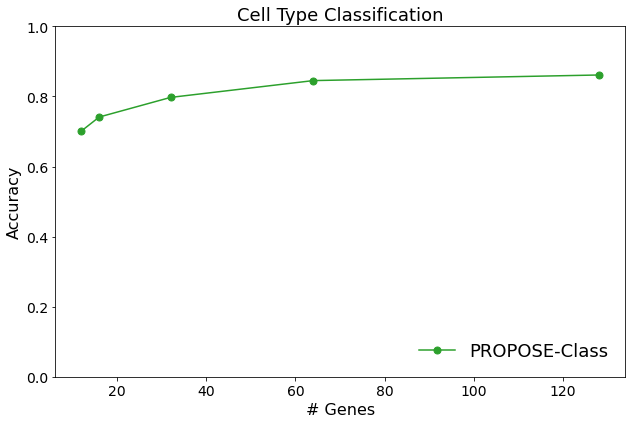

In [6]:
# Make plot
plt.figure(figsize=(9, 6))
plt.plot(num_features, [results['PROPOSE-Class'][num] for num in num_features],
         marker='o', markersize=7, color='C2', label='PROPOSE-Class')
plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('Cell Type Classification', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tight_layout()
plt.ylim([0,1])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


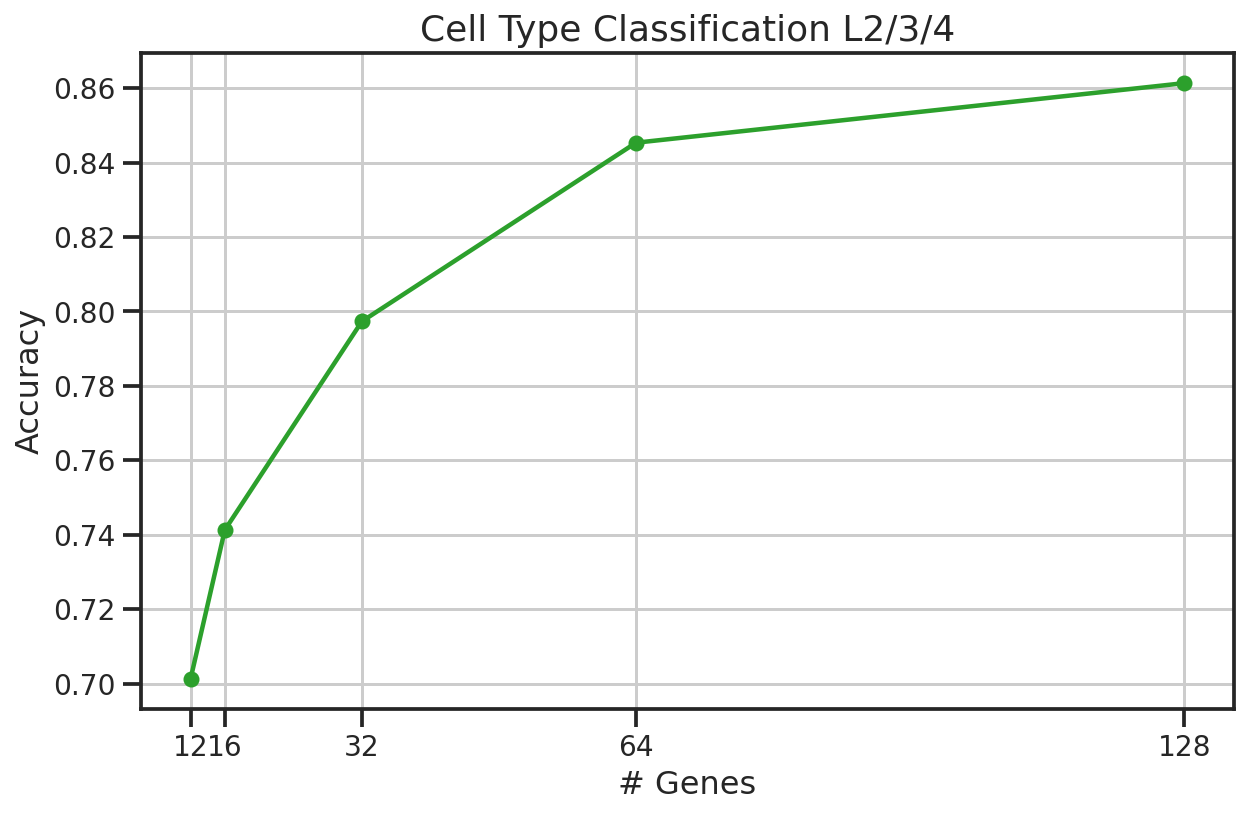

In [13]:
# Make plot
plt.figure(figsize=(9, 6))
plt.plot(num_features, [results['PROPOSE-Class'][num] for num in num_features],
         marker='o', markersize=7, color='C2',)
plt.legend(loc='lower right', fontsize=18, frameon=False)
plt.tick_params(labelsize=14)
plt.title('Cell Type Classification L2/3/4', fontsize=18)
plt.xlabel('# Genes', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tight_layout()
# plt.ylim([0,1])
plt.xticks(num_features)
plt.show()

In [14]:
results

{'PROPOSE-Class': {128: 0.8613333106040955,
  64: 0.8453333377838135,
  32: 0.797333300113678,
  16: 0.7413333058357239,
  12: 0.7013333439826965}}

# get gene names

In [5]:
# which genes
with open(os.path.join(resdir, 'res_merfish_L234_allgenes_oct6.pkl'), 'rb') as f:
    res = pickle.load(f)
res

{400: array([   38,   110,   151,   230,   323,   634,   819,   822,   991,
         1120,  1131,  1282,  1299,  1304,  1721,  1796,  1995,  2126,
         2141,  2159,  2168,  2203,  2228,  2242,  2249,  2285,  2387,
         2467,  2480,  2491,  2675,  2845,  3034,  3156,  3291,  3475,
         3675,  3761,  3806,  4194,  4234,  4574,  4585,  4593,  4636,
         4653,  4657,  4905,  5407,  5605,  5620,  5695,  5772,  6096,
         6272,  6332,  6773,  6838,  6846,  6889,  6924,  6941,  7012,
         7536,  7844,  7878,  7928,  8073,  8252,  8455,  8503,  8692,
         9266,  9296,  9333,  9686,  9893,  9988, 10165, 10245, 10471,
        10700, 10701, 10709, 10907, 11021, 11934, 11984, 12007, 12019,
        12068, 12288, 12453, 12488, 12536, 12580, 12674, 12678, 12735,
        12849, 12899, 12937, 12998, 13028, 13092, 13153, 13193, 13206,
        13332, 13511, 13608, 13629, 13752, 14021, 14108, 14376, 14434,
        14456, 14556, 14559, 14580, 14589, 14682, 14724, 14749, 14756,
 

In [16]:

print(np.unique(res[400]).shape)
print(np.unique(res[450]).shape)
print(np.unique(res[500]).shape)
print(np.unique(res[550]).shape)

(399,)
(450,)
(500,)
(550,)


In [20]:
unq, cnts = np.unique(res[400], return_counts=True)
unq[cnts>1]

array([52855])

In [21]:
res[400]

array([   38,   110,   151,   230,   323,   634,   819,   822,   991,
        1120,  1131,  1282,  1299,  1304,  1721,  1796,  1995,  2126,
        2141,  2159,  2168,  2203,  2228,  2242,  2249,  2285,  2387,
        2467,  2480,  2491,  2675,  2845,  3034,  3156,  3291,  3475,
        3675,  3761,  3806,  4194,  4234,  4574,  4585,  4593,  4636,
        4653,  4657,  4905,  5407,  5605,  5620,  5695,  5772,  6096,
        6272,  6332,  6773,  6838,  6846,  6889,  6924,  6941,  7012,
        7536,  7844,  7878,  7928,  8073,  8252,  8455,  8503,  8692,
        9266,  9296,  9333,  9686,  9893,  9988, 10165, 10245, 10471,
       10700, 10701, 10709, 10907, 11021, 11934, 11984, 12007, 12019,
       12068, 12288, 12453, 12488, 12536, 12580, 12674, 12678, 12735,
       12849, 12899, 12937, 12998, 13028, 13092, 13153, 13193, 13206,
       13332, 13511, 13608, 13629, 13752, 14021, 14108, 14376, 14434,
       14456, 14556, 14559, 14580, 14589, 14682, 14724, 14749, 14756,
       14870, 14877,

In [6]:
ddir = '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/counts/'
f = os.path.join(ddir, "P38_1a2a_glut.h5ad")
gene_names = anndata.read(f).var.index.values

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:
gene_names[res[400]]

array(['Rgs20', 'Sgk3', 'Sulf1', 'Crispld1', 'Col19a1', 'Gm20646',
       'Pgap1', 'Ankrd44', 'Nrp2', 'Ikzf2', 'Vwc2l', 'Sgpp2', 'Scg2',
       'Wdfy1', 'Gm7135', 'Tnfrsf11a', 'Gm38073', 'Lemd1', 'Cntn2',
       'Etnk2', 'Atp2b4', 'Syt2', 'Nav1', 'Igfn1', 'Kif21b', 'Gm4258',
       'Brinp3', 'Rgl1', 'Lamc2', 'Rgs8', 'Dnm3', 'Nos1ap', 'Pld5',
       'Cnih3', 'Kcnk2', 'Ccdc3', 'Pfkfb3', 'Nebl', 'Etl4',
       '1110008P14Rik', 'Garnl3', 'Ccdc148', 'Tanc1', 'March7', 'Grb14',
       'Ttc21b', 'Gm13629', 'Pde1a', 'Syt13', 'Bdnf', 'Ano3', 'Ryr3',
       'Pak6', 'Adam33', 'Slc24a3', 'Cst3', 'Dbndd2', 'Sulf2', 'Prex1',
       'Ptpn1', 'Tshz2', 'Dok5', 'Zfp831', 'Usp11', 'Tenm1', 'Smarca1',
       'Mbnl3', 'Fgf13', 'Gabra3', 'Prrg1', 'Gk', 'Eda', 'Morf4l2',
       'Il1rapl2', 'Frmpd3', 'Phka2', 'Pag1', 'Cyp7b1', '4930419G24Rik',
       'Trpc3', 'Foxo1', 'Kcnab1', 'A330015K06Rik', 'Tiparp', 'Gucy1a1',
       'Bcan', 'Olfm3', 'Palmd', 'Dpyd', '6530403H02Rik', 'Fnbp1l',
       'Cxxc4', 'Lmo4', 'Dd

# get heatmap

In [9]:
def rename_clsts(x):
    thedict = {
        'L2/3_A': 'L2/3_B',
        'L2/3_B': 'L2/3_A',
    }
    if x in thedict.keys():
        return thedict[x]
    else:
        return x

In [10]:
f = '../data_dump/P38_glut.h5ad'
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 10485 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Type_colors', 'cluster_colors', "dendrogram_['leiden']", 'hvg', 'layer_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [11]:
adata = adata[adata.obs['cluster'].str.contains(r'^L2|L4')]
adata.obs['cluster'] = adata.obs['cluster'].apply(rename_clsts) 

# zscore
adata.X = basicu.zscore(adata.X, axis=0)
adata

Trying to set attribute `.obs` of view, copying.
/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Utils/basicu.py:314: RuntimeWarning: invalid value encountered in true_divide
  return (v-np.mean(v, **kwargs))/(np.std(v, **kwargs))


AnnData object with n_obs × n_vars = 5837 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Type_colors', 'cluster_colors', "dendrogram_['leiden']", 'hvg', 'layer_colors', 'leiden', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
Xk, xclsts = basicu.group_mean(adata.X, adata.obs['cluster'])
Xk = np.array(Xk)
Xk = pd.DataFrame(Xk, index=xclsts, columns=adata.var.index)
Xk.shape, xclsts.shape, xclsts

((6, 30869),
 (6,),
 array(['L2/3_A', 'L2/3_B', 'L2/3_C', 'L4_A', 'L4_B', 'L4_C'], dtype=object))

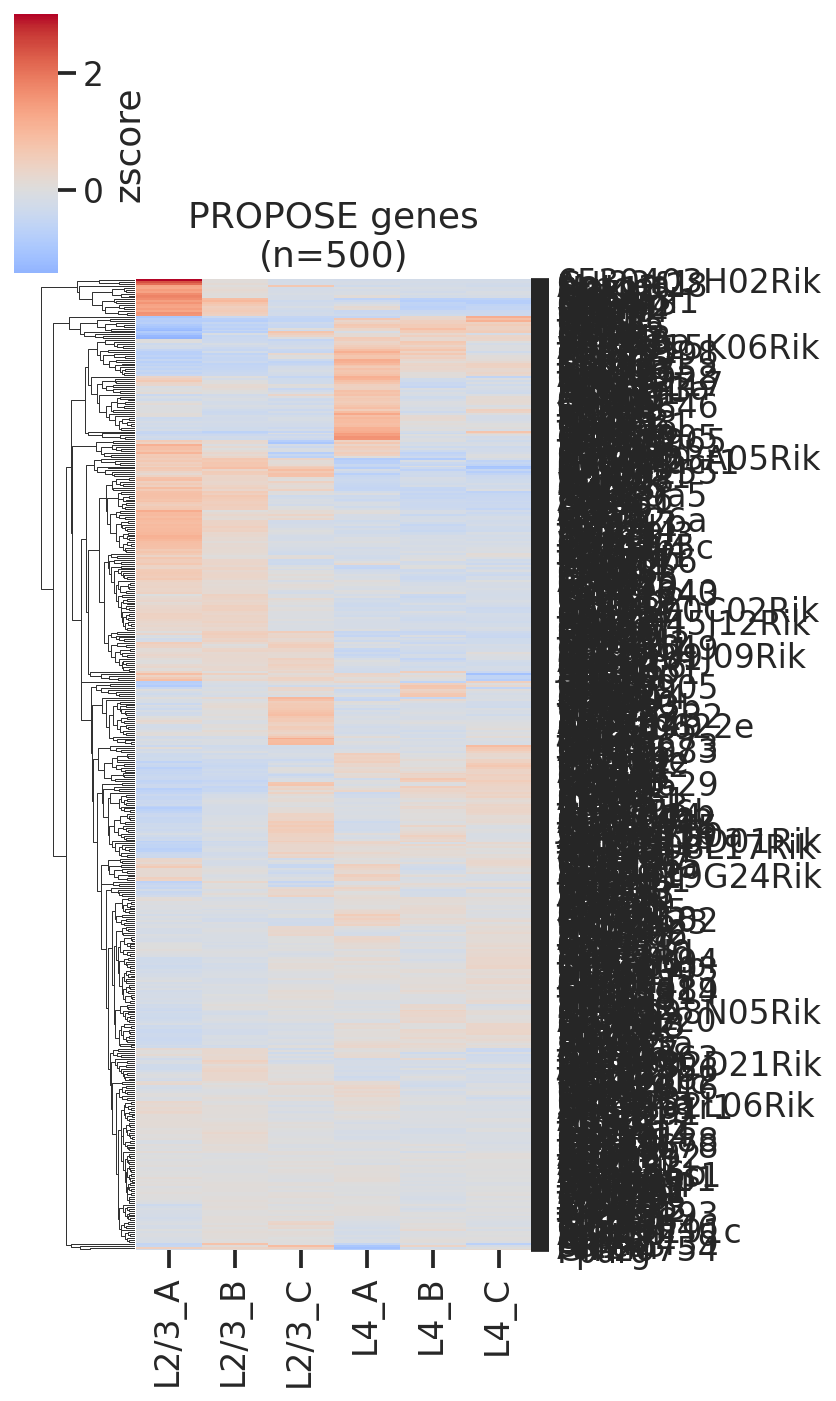

In [13]:
# for num in num_features[::-1]:
for num in [500]:
    X_s = Xk[gene_names[res[num]]].T
    g = sns.clustermap(X_s,
                    col_cluster=False,
                    yticklabels=True,
                    cmap='coolwarm',
                    center=0,
                    # vmax=1.5, vmin=-1.5,
                    # vmax=2, vmin=-2,
                    figsize=(6,min(10, num*0.4)), 
                    cbar_kws=dict(label='zscore')
                   )
    g.ax_heatmap.set_title(f"PROPOSE genes\n(n={len(X_s)})")
    plt.show()